In [ ]:
# Librerias
import sys 

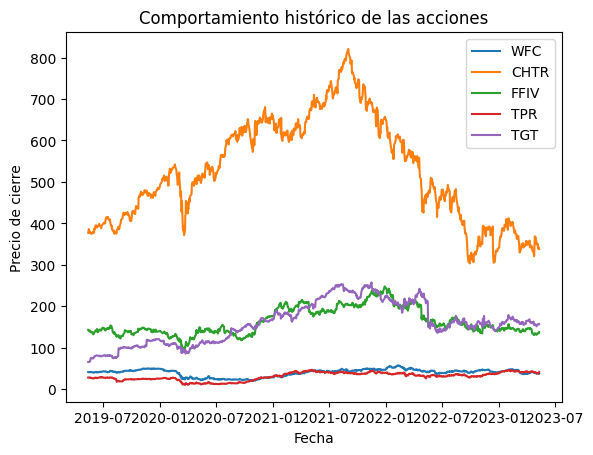

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Lista de tickers
tickerSymbols = ["WFC", "CHTR", "FFIV", "TPR","TGT"]  # Agrega más tickers según tus necesidades

# Rango de fecha
startDate = '2019-05-15' #  strings
endDate = '2023-05-15' #  strings

# Iterar sobre los tickers
for tickerSymbol in tickerSymbols:
    # Obtener los datos de la acción
    tickerData = yf.Ticker(tickerSymbol)
    df = tickerData.history(start=startDate, end=endDate)

    # Graficar los precios de cierre
    plt.plot(df['Close'], label=tickerSymbol)

# Configurar el gráfico
plt.title("Comportamiento histórico de las acciones")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd



# Crear un diccionario para almacenar las matrices de correlación
correlation_matrices = {}

# Iterar sobre los tickers
for tickerSymbol in tickerSymbols:
    # Obtener los datos de la acción
    tickerData = yf.Ticker(tickerSymbol)
    df = tickerData.history(start=startDate, end=endDate)

    # Calcular la matriz de correlación
    correlation_matrix = df.corr()

    # Almacenar la matriz de correlación en el diccionario
    correlation_matrices[tickerSymbol] = correlation_matrix

# Imprimir las matrices de correlación
for tickerSymbol, correlation_matrix in correlation_matrices.items():
    print("Ticker:", tickerSymbol)
    print(correlation_matrix)
    print("---------------------")


Ticker: WFC
                  Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.998732  0.998435  0.996981 -0.519376   0.023432   
High          0.998732  1.000000  0.998140  0.998531 -0.507160   0.021983   
Low           0.998435  0.998140  1.000000  0.998610 -0.537095   0.022493   
Close         0.996981  0.998531  0.998610  1.000000 -0.524151   0.021558   
Volume       -0.519376 -0.507160 -0.537095 -0.524151  1.000000   0.001717   
Dividends     0.023432  0.021983  0.022493  0.021558  0.001717   1.000000   
Stock Splits       NaN       NaN       NaN       NaN       NaN        NaN   

              Stock Splits  
Open                   NaN  
High                   NaN  
Low                    NaN  
Close                  NaN  
Volume                 NaN  
Dividends              NaN  
Stock Splits           NaN  
---------------------
Ticker: CHTR
                  Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.9

<ipython-input-5-093422a513b1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + correlation_matrix.columns, rotation=90)
<ipython-input-5-093422a513b1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + correlation_matrix.columns)


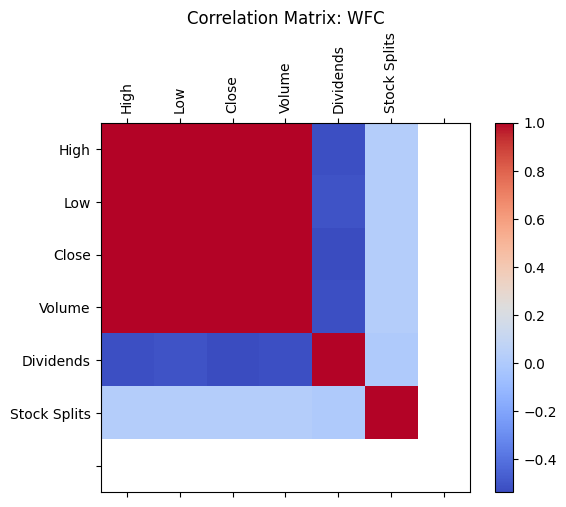

<ipython-input-5-093422a513b1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + correlation_matrix.columns, rotation=90)
<ipython-input-5-093422a513b1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + correlation_matrix.columns)


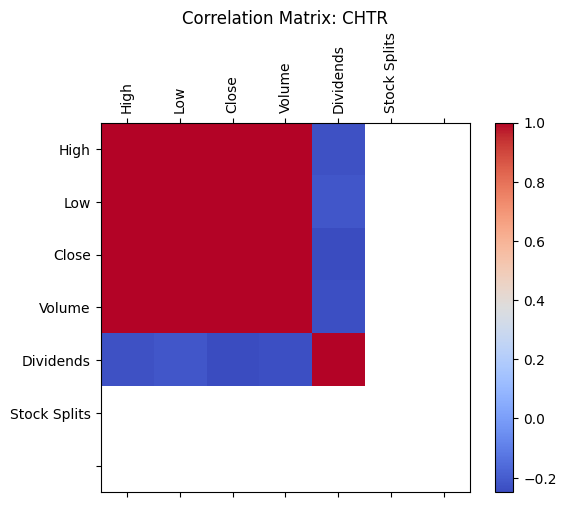

<ipython-input-5-093422a513b1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + correlation_matrix.columns, rotation=90)
<ipython-input-5-093422a513b1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + correlation_matrix.columns)


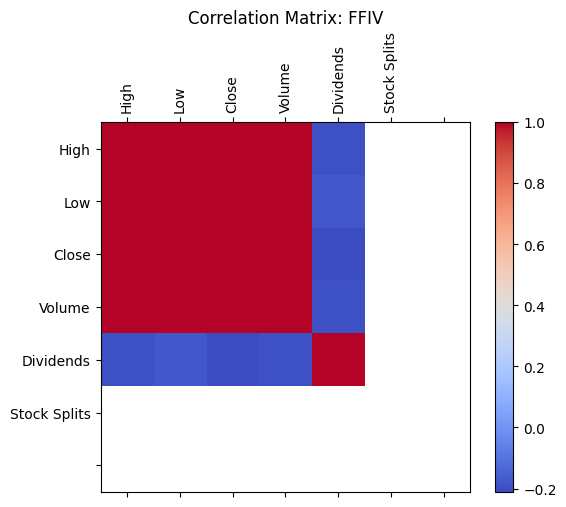

<ipython-input-5-093422a513b1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + correlation_matrix.columns, rotation=90)
<ipython-input-5-093422a513b1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + correlation_matrix.columns)


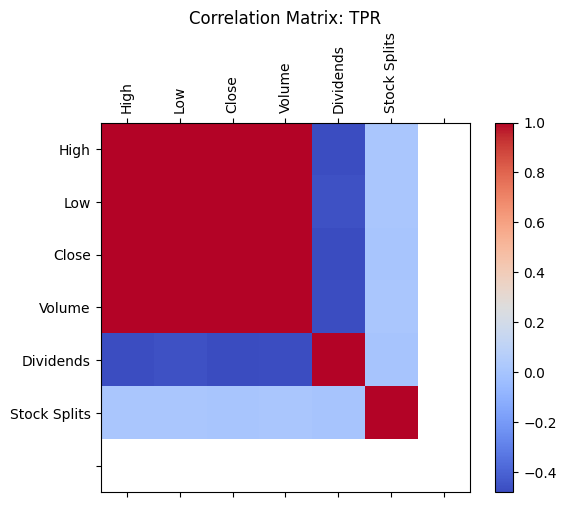

<ipython-input-5-093422a513b1>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + correlation_matrix.columns, rotation=90)
<ipython-input-5-093422a513b1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + correlation_matrix.columns)


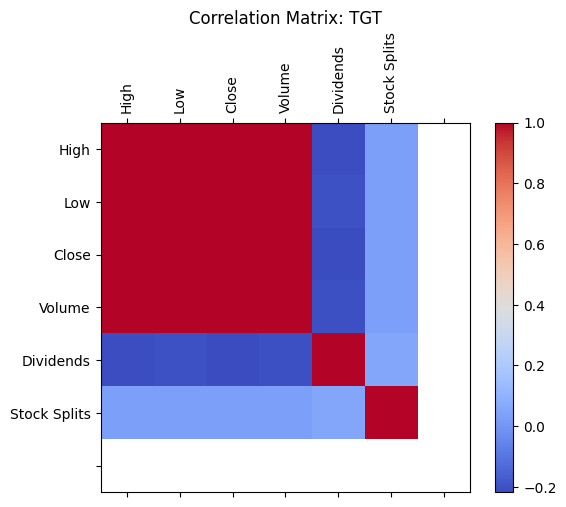

In [ ]:
import matplotlib.pyplot as plt

# Iterar sobre las matrices de correlación
for tickerSymbol, correlation_matrix in correlation_matrices.items():
    # Crear una figura y un eje
    fig, ax = plt.subplots()
    
    # Crear un mapa de calor de la matriz de correlación
    cax = ax.matshow(correlation_matrix, cmap='coolwarm')
    
    # Agregar una barra de color
    fig.colorbar(cax)
    
    # Establecer las etiquetas de los ejes x e y
    ax.set_xticklabels([''] + correlation_matrix.columns, rotation=90)
    ax.set_yticklabels([''] + correlation_matrix.columns)
    
    # Mostrar el título del gráfico
    ax.set_title('Correlation Matrix: {}'.format(tickerSymbol))
    
    # Mostrar el gráfico
    plt.show()


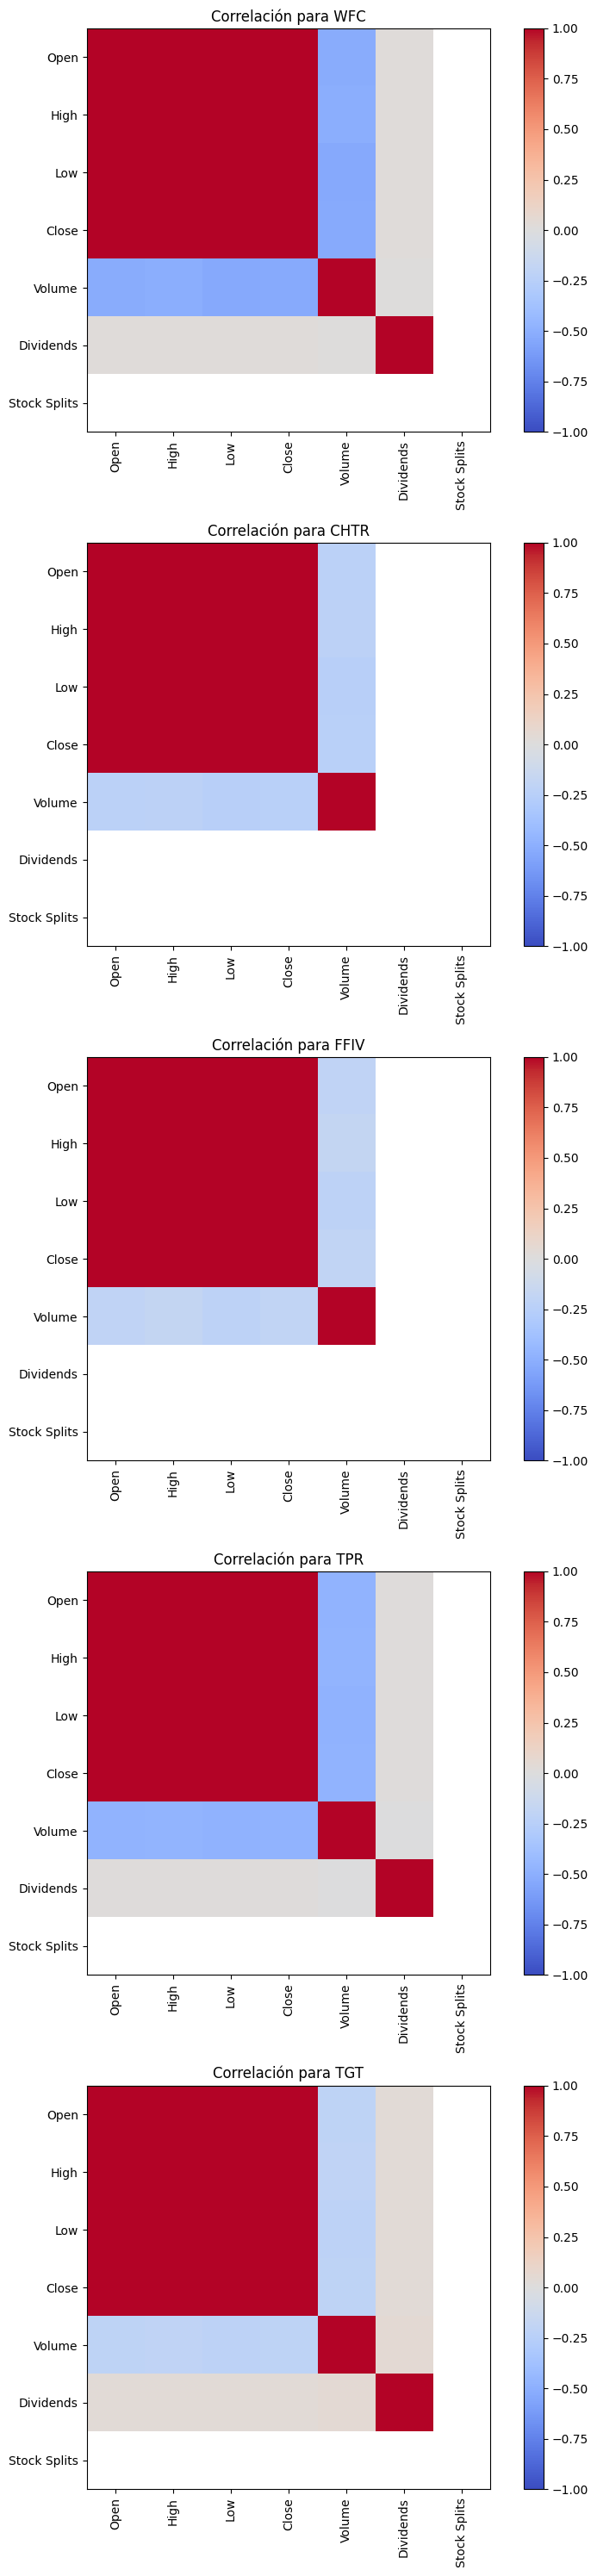

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para los gráficos de correlación
fig, axes = plt.subplots(nrows=len(correlation_matrices), ncols=1, figsize=(8, 6 * len(correlation_matrices)))

# Iterar sobre las matrices de correlación y los ejes
for i, (tickerSymbol, correlation_matrix) in enumerate(correlation_matrices.items()):
    # Seleccionar el eje correspondiente
    ax = axes[i]

    # Graficar la matriz de correlación en el eje actual
    im = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

    # Configurar el título y etiquetas de los ejes
    ax.set_title(f"Correlación para {tickerSymbol}")
    ax.set_xticks(range(len(correlation_matrix.columns)))
    ax.set_xticklabels(correlation_matrix.columns, rotation=90)
    ax.set_yticks(range(len(correlation_matrix.columns)))
    ax.set_yticklabels(correlation_matrix.columns)

    # Agregar una barra de color
    cbar = ax.figure.colorbar(im, ax=ax)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()
